<a href="https://colab.research.google.com/github/Shravikajain/Tensorflow/blob/main/nnc_section_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000
X,y = make_circles(n_samples,noise = 0.03,random_state = 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now... let's visualiz it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


<function matplotlib.pyplot.show(close=None, block=None)>

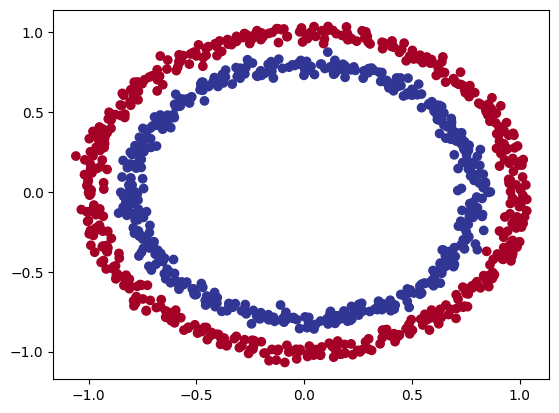

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show

In [ ]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.9473 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9446 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.5151 - accuracy: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.4960


In [ ]:
model_1.fit(X,y,epochs = 200, verbose = 0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation = "softmax")

])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose = 0)


In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.5000


[0.1089756116271019, 0.5]

In [ ]:
import numpy as np


In [ ]:
#to visulise
def plot_decision_boundary(model,X,y):

  x_min,x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  if len(y_pred[0])>1:
    print("multinomial classification")
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round( y_pred).reshape(xx.shape)
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha = 0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())



313/313 [==============================] - 1s 2ms/step
binary classification


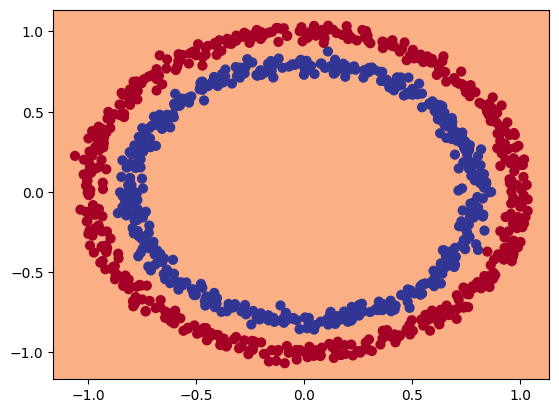

In [ ]:
plot_decision_boundary(model = model_2, X = X, y = y)
#

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])

model_4.compile(loss ="binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(lr = 0.3),
                metrics = ["accuracy"])
history = model_4.fit(X,y,epochs = 100)

NameError: name 'tf' is not defined

313/313 [==============================] - 1s 3ms/step
binary classification


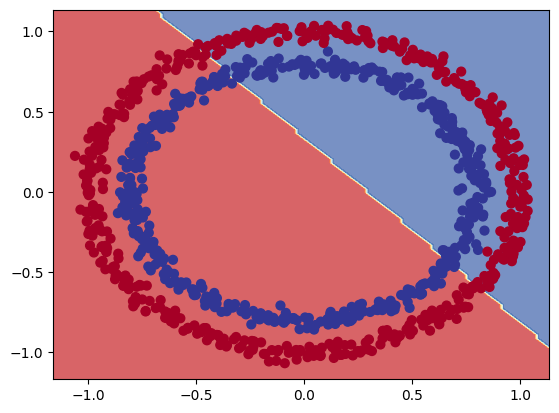

In [ ]:
plot_decision_boundary(model = model_4, X= X , y = y)

In [ ]:
import tensorflow as tf

In [ ]:
# model_6

tf.random.set_seed(42)

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1)

])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
history = model_6.fit(X, y, epochs = 250,verbose = 0)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5300


[0.6800932288169861, 0.5299999713897705]

313/313 [==============================] - 1s 2ms/step
binary classification


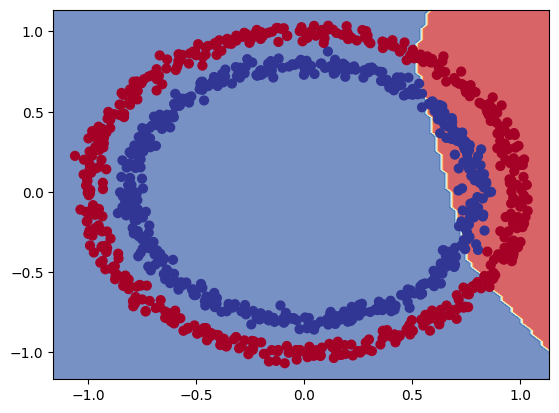

In [ ]:
plot_decision_boundary(model = model_6,X=X,y=y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
             metrics = ["accuracy"])
model_7.fit(X , y, epochs = 100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5420
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6080
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.7290
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7610
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7940
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8570
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.9180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.9300
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9740
Epoch 11/

In [ ]:
model_7.evaluate(X , y )

32/32 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9900


[0.02692330628633499, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
binary classification


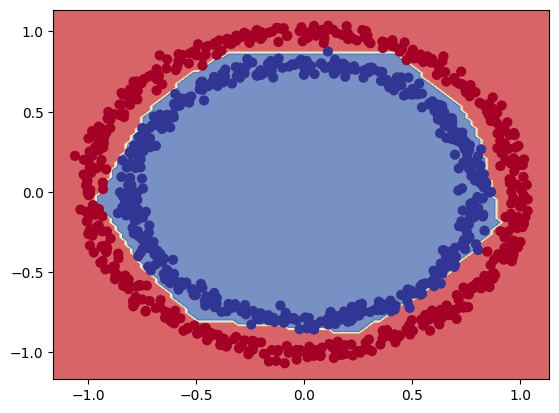

In [ ]:
plot_decision_boundary(model = model_7 , X = X , y=y)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create a toy a tensor( similiar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

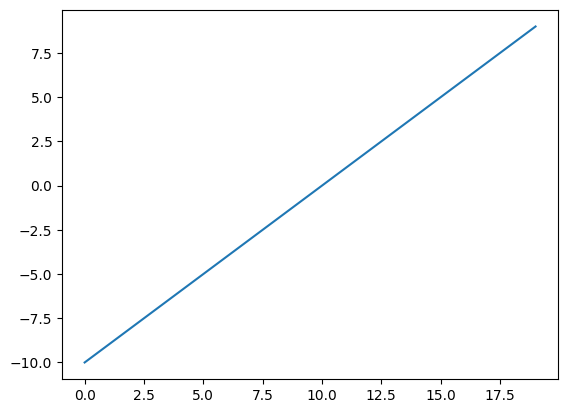

In [ ]:
plt.plot(A)

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
b = sigmoid(A)

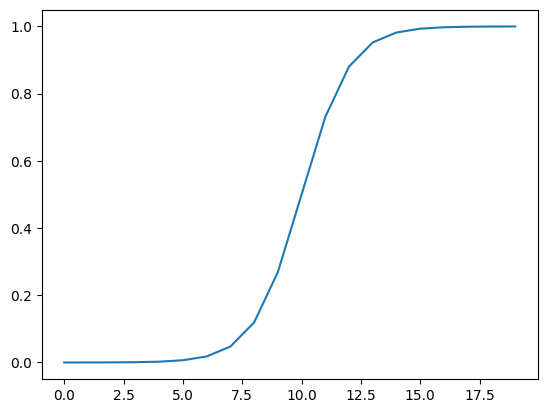

In [ ]:
plt.plot(b)

In [ ]:
def relu(x):
  return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

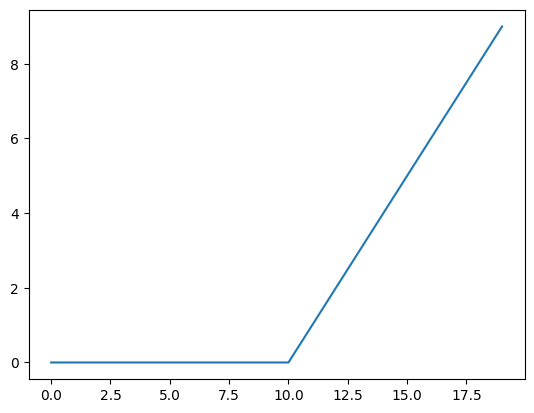

In [ ]:
plt.plot((relu(A)))

In [ ]:
Z = tf.keras.activations.linear(A)

In [ ]:
plt.plot(Z)

NameError: name 'Z' is not defined

In [ ]:
X_train ,  y_train = X[:800],y[:800]
X_test , y_test = X[800:],y[800:]
X_train.shape , X_test.shape , y_test.shape , y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [ ]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])
history = model_8.fit(X_train,y_train,epochs = 100)


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4888
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4900
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.4925
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5075
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5100
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5100
Epoch 11/

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 1.0000


[0.3030681014060974, 1.0]

313/313 [==============================] - 1s 3ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


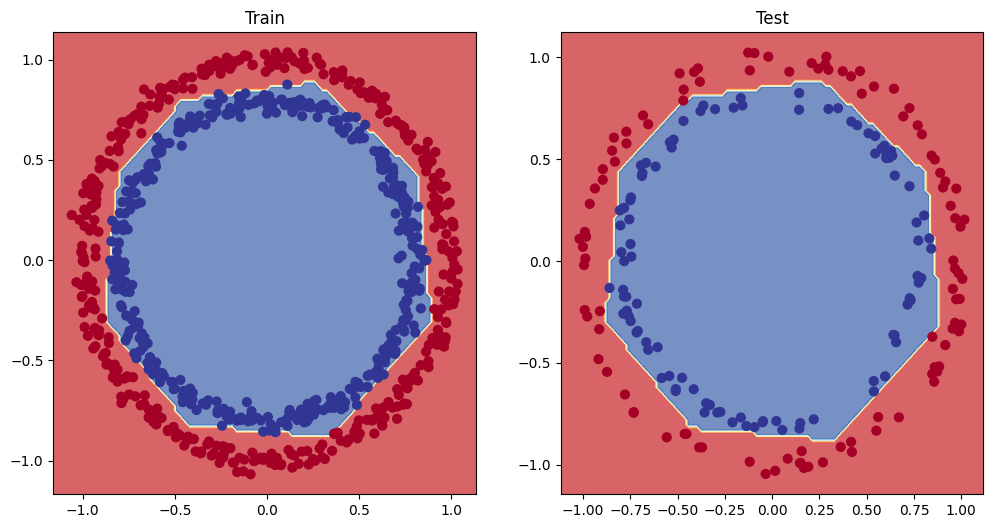

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693585,0.48500
1,0.691505,0.48875
2,0.690072,0.49000
3,0.689091,0.49000
4,0.688437,0.49250
...,...,...
95,0.327729,0.98625
96,0.323270,0.98625
97,0.316956,0.98875
98,0.311849,0.99000


Text(0.5, 1.0, 'model_8 training curves')

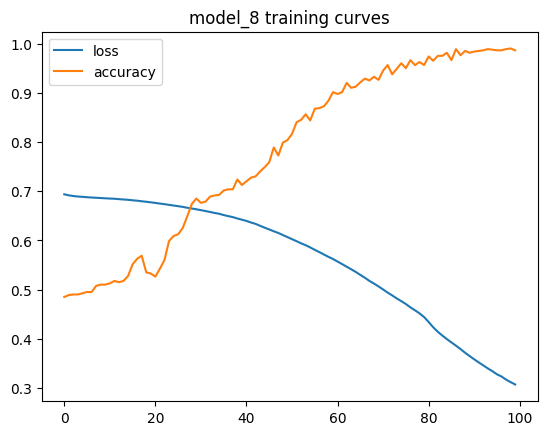

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model_8 training curves")

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7022 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [ ]:
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20, verbose = 0)


In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
confusion_matrix(y_test,y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
z = tf.round(y_preds)

In [ ]:
confusion_matrix(y_test,z)


array([[25, 76],
       [ 1, 98]])

In [ ]:
import numpy as np

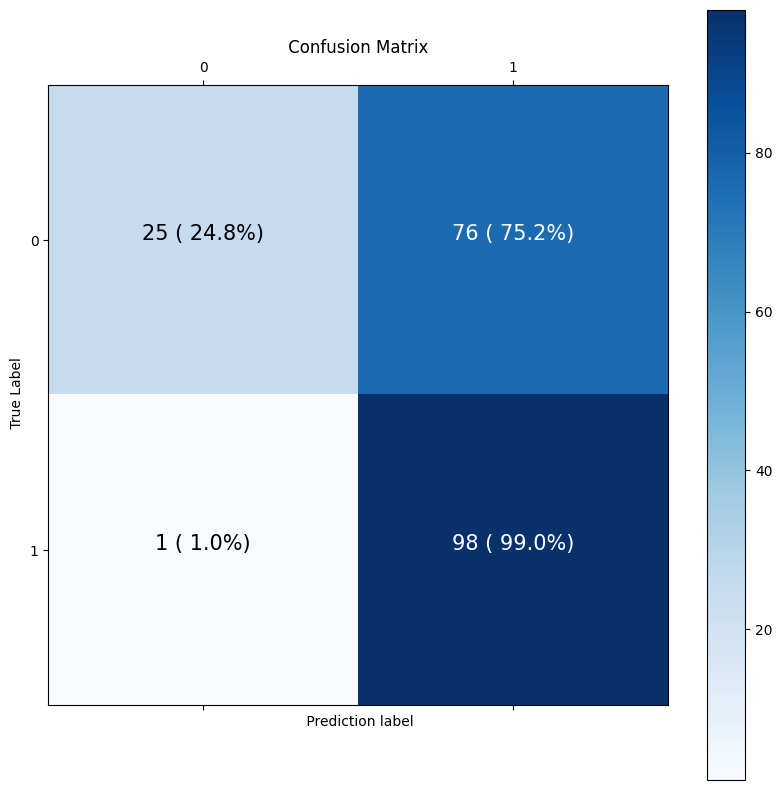

In [ ]:
import itertools

figsize =(10,10)

cm = confusion_matrix(y_test ,tf.round(y_preds))

cm_norm = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis]

n_classes = cm.shape[0]

fig , ax = plt.subplots(figsize = figsize)

cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = " Confusion Matrix ",
                  xlabel = " Prediction label",
                  ylabel = " True Label",
                  xticks = np.arange(n_classes),
                  yticks = np.arange(n_classes),
                  xticklabels = labels,
                  yticklabels = labels)

threshold = (cm.max() + cm.min()) /2.

for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i , j ]*100: .1f}%)",
                 horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)



In [ ]:
cm_norm

array([[0.24752475, 0.75247525],
       [0.01010101, 0.98989899]])

In [ ]:
cm.shape[0]

2

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()




4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f"training sample : \n { train_data[0]}\n ")
print(f"training label : \n { train_labels[0]}\n ")


training sample : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

In [ ]:
train_data[0].shape , train_labels[0].shape

((28, 28), ())

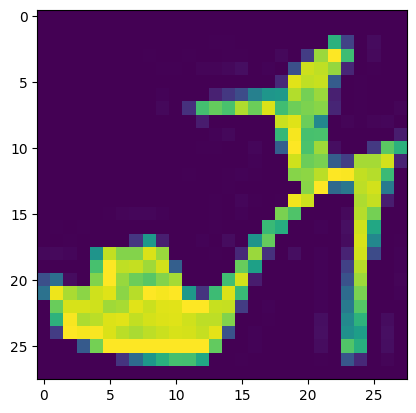

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[9]);


In [ ]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Bag')

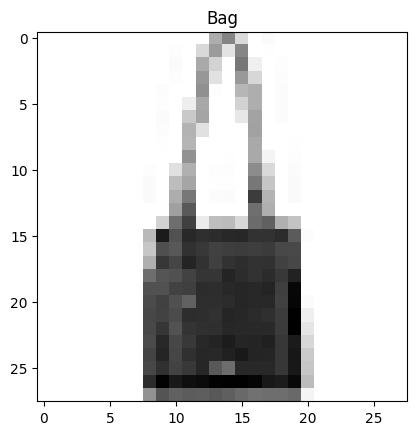

In [ ]:
index_of_choice = 200
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

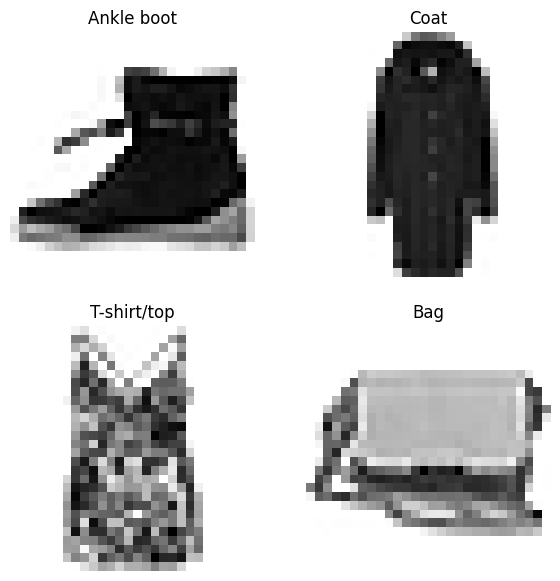

In [ ]:
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape =(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
input_shape=(28,28)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4 , activation ="relu" ),
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax )
])
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs = 10,
                                validation_data = (test_data , test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3218 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
train_data.max(), train_data.min()

(255, 0)

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5093 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy:

<Axes: title={'center': ' Normalized data'}>

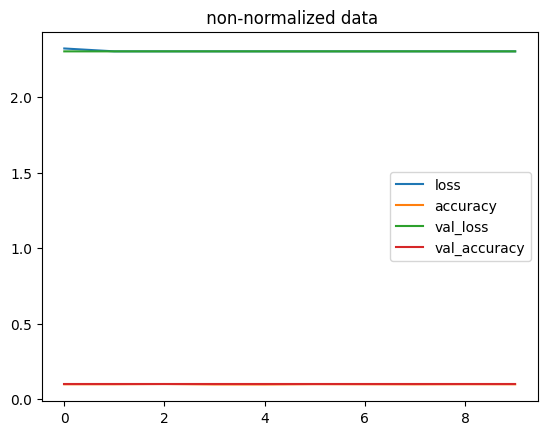

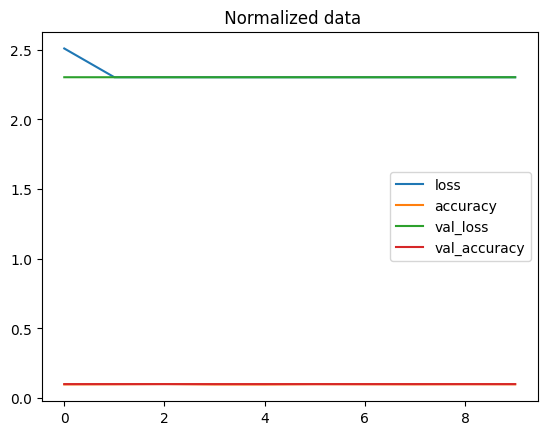

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title = " non-normalized data")
pd.DataFrame(norm_history.history).plot(title = " Normalized data")

In [ ]:
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3727 - accuracy: 0.0994 - val_loss: 2.3037 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

ValueError: x and y must have same first dimension, but have shapes (2,) and (40,)

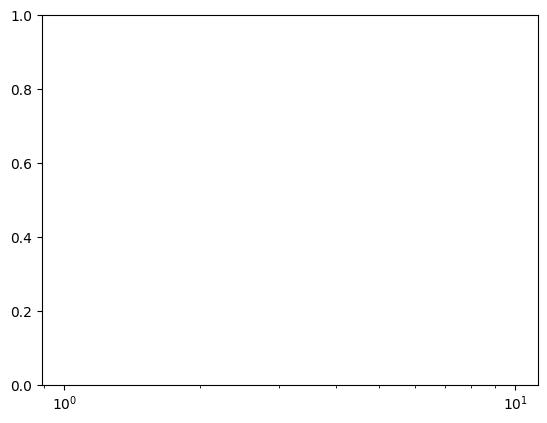

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40/20)))
plt.semilogx(lrs , find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

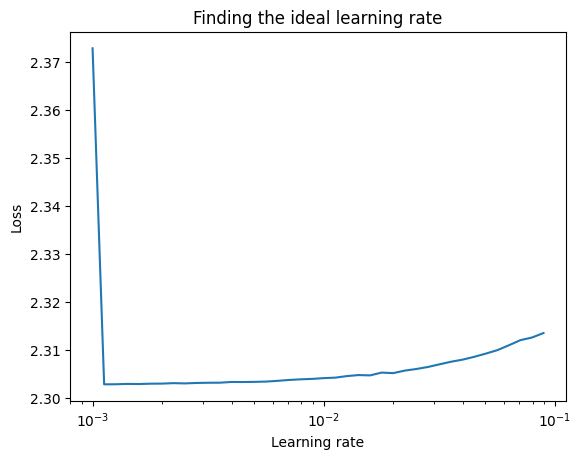

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3243 - accuracy: 0.1412 - val_loss: 2.1779 - val_accuracy: 0.1767
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1180 - accuracy: 0.1729 - val_loss: 2.0886 - val_accuracy: 0.1823
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9841 - accuracy: 0.2163 - val_loss: 1.8001 - val_accuracy: 0.2623
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7608 - accuracy: 0.2450 - val_loss: 1.7368 - val_accuracy: 0.2569
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7146 - accuracy: 0.2564 - val_loss: 1.6810 - val_accuracy: 0.2795
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6506 - accuracy: 0.2940 - val_loss: 1.5507 - val_accuracy: 0.3449
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4965 - accuracy: 0.3783 - val_loss: 1.4440 - val_accuracy

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = model_14.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_probs[:5]

array([[4.4008458e-27, 0.0000000e+00, 0.0000000e+00, 7.3852465e-37,
        0.0000000e+00, 4.1443389e-02, 5.2177222e-29, 1.0362345e-01,
        2.2373209e-03, 8.5269588e-01],
       [1.6115451e-01, 1.6633898e-01, 1.6528812e-01, 1.6362549e-01,
        1.6338240e-01, 6.7879562e-05, 1.6102743e-01, 1.2894674e-05,
        1.8784588e-02, 3.1770306e-04],
       [1.6115451e-01, 1.6633898e-01, 1.6528812e-01, 1.6362549e-01,
        1.6338240e-01, 6.7879562e-05, 1.6102743e-01, 1.2894674e-05,
        1.8784588e-02, 3.1770306e-04],
       [1.6115451e-01, 1.6633898e-01, 1.6528812e-01, 1.6362549e-01,
        1.6338240e-01, 6.7879562e-05, 1.6102743e-01, 1.2894674e-05,
        1.8784588e-02, 3.1770306e-04],
       [1.6115451e-01, 1.6633898e-01, 1.6528812e-01, 1.6362549e-01,
        1.6338240e-01, 6.7879562e-05, 1.6102743e-01, 1.2894674e-05,
        1.8784588e-02, 3.1770306e-04]], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[ 13, 967,   0,   0,   0,   0,   0,   0,  19,   1],
       [  2, 996,   0,   0,   0,   0,   0,   0,   2,   0],
       [  6, 989,   0,   0,   0,   0,   0,   0,   5,   0],
       [ 21, 971,   0,   0,   0,   0,   0,   0,   8,   0],
       [  8, 985,   0,   0,   0,   3,   0,   0,   4,   0],
       [  2,   1,   0,   0,   0, 840,   0,  60,  28,  69],
       [ 19, 955,   0,   0,   0,   0,   0,   0,  26,   0],
       [  0,   0,   0,   0,   0,  20,   0, 894,   4,  82],
       [ 34,  41,   0,   0,   0,   6,   0,   2, 910,   7],
       [  0,   0,   0,   0,   0,   1,   0,  53,  24, 922]])

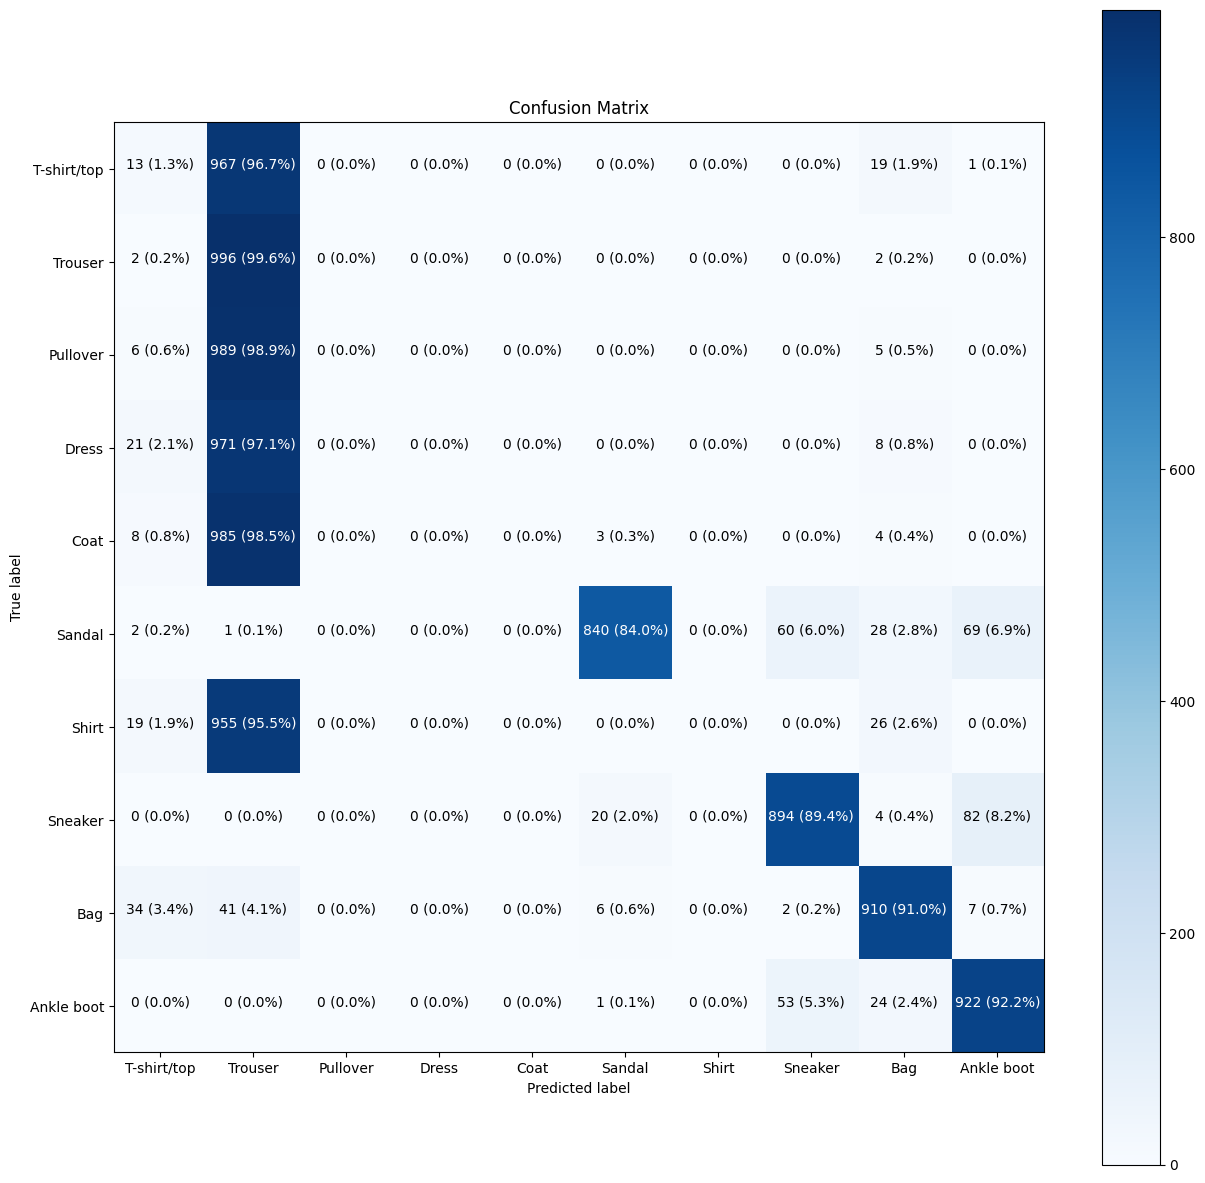

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model , images , true_labels , classes ):
  i = random.randint(0,len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)


  if pred_label == true_label:
    color = "green"
  else :
    color = "red"

  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
       true_label),color = color)


1/1 [==============================] - 0s 25ms/step


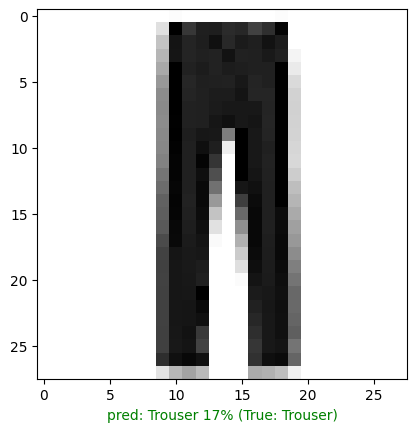

In [ ]:
plot_random_image(model = model_14,
                  images = test_data,
                  classes = class_names)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np